## Set-Up

% Chance of a sunny day: 20
% Chance of cloudy day: 40
% Chance of rainy day: 40
% Chance of cloudy day after a sunny day: 20
% Chance of cloudy day after a cloudy day: 40
% Chance of cloudy day after a rainy day: 60
What is the weather condition today? (S)unny, (C)loudy, (R)ainy: c
After how many days do you want to predict?: 4

After 4 days...
% Chance of rain: 33.3 
% Chance of clouds: 38.6 
% Chance of sun: 28.2
['Chance of rain', 'Chance of clouds', 'Chance of sun']
[33.3, 38.6, 28.2]


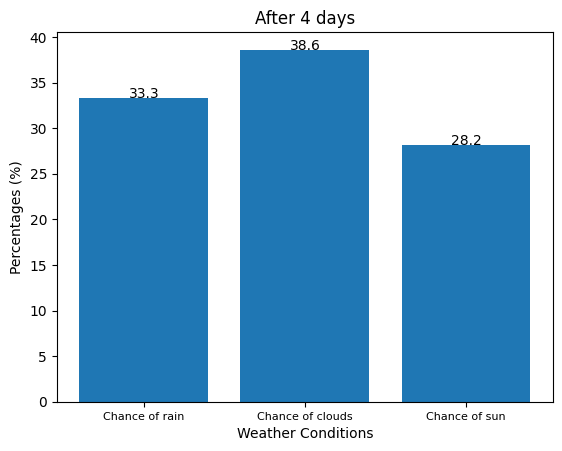

In [7]:
import numpy as np
import matplotlib.pyplot as plt


s = float(input("% Chance of a sunny day: ")) / 100
c = float(input("% Chance of cloudy day: ")) / 100
r = float(input("% Chance of rainy day: ")) / 100
s2 = float(input("% Chance of cloudy day after a sunny day: ")) / 100
c2 = float(input("% Chance of cloudy day after a cloudy day: ")) / 100
r2 = float(input("% Chance of cloudy day after a rainy day: ")) / 100

condition = input("What is the weather condition today? (S)unny, (C)loudy, (R)ainy: ").lower()
if condition == 's':
    s0 = np.matrix([[1], [0], [0]]) # Columns Matrix
elif condition == 'c':
    s0 = np.matrix([[0], [1], [0]]) # Column Matrix
elif condition == 'r':
    s0 = np.matrix([[0], [0], [1]]) # Column Matrix
else:
    print("Wrong input! Please choose r, c, or s.")
    quit()

rt = 1 - (r+r2)
ct = 1 - (c+c2)
st = 1 - (s+s2)

a = np.matrix([[s, c, r], 
               [s2, c2, r2], 
               [st, ct, rt]]) # Three row matrices

# s1 = as0 --> after one day
days = int(input("After how many days do you want to predict?: "))
for i in range(days):
    s0 = a * s0
    
rain_prediction = float('%.1f'%(s0.item(0)*100)) # One digit after decimal
cloud_prediction = float('%.1f'%(s0.item(1)*100))
sunny_prediction = float('%.1f'%(s0.item(2)*100))

weather_condition = [rain_prediction, cloud_prediction, sunny_prediction] # y-axis


print("\nAfter" , days , "days...\n% Chance of rain:" , rain_prediction, "\n% Chance of clouds:" , cloud_prediction, "\n% Chance of sun:" , sunny_prediction)

conditions = ['Chance of rain', 'Chance of clouds', 'Chance of sun'] # x-axis

print(conditions)
print(weather_condition)

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
add_labels(conditions, weather_condition)

plt.bar(conditions, weather_condition)
plt.xticks(conditions, size = 8)
plt.ylabel("Percentages (%)")
plt.xlabel("Weather Conditions")
plt.title("After " + str(days) + " days")

plt.show()